Loading data sets...
Training the classifier...
Training Complete!


AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_decision_function'

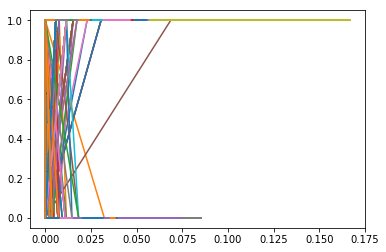

In [13]:
import string
from nltk.corpus import stopwords
from string import punctuation
from os import listdir
from collections import Counter
from numpy import array
from keras.preprocessing.text import Tokenizer
from sklearn import svm


#Open file in read-only and extract content into variable 'content'
def loadFile(filename):
    openFile = open(filename, 'r')
    content = openFile.read()
    openFile.close()
    return content

#Tokenize file
def tokenizeFile(filename):
    tokens = filename.split()                                   #remove whitespace
    tokens = [x.strip(string.punctuation) for x in tokens]           #remove punctuation
    tokens = [word for word in tokens if word.isalpha()]        #remove none alphabetic words
    stopWords = set(stopwords.words('english'))                 #remove stop words
    tokens = [word for word in tokens if not word in stopWords]
    tokens = [word for word in tokens if len(word) > 1]         #remove 1-letter tokens
    return tokens

#Convert tokens to single strings for easier encoding
def fileToLine(filename, vocab):
    content = loadFile(filename)
    tokens = tokenizeFile(content)
    tokens = [word for word in tokens if word in vocab]
    return ' '.join(tokens)

#Load all reviews and start mapping words to counter
def loadReviews(directory, vocab, is_train):
    lines = list()
    for filename in listdir(directory):
        if filename.startswith('cv9') and is_train:
            continue
        if not filename.startswith('cv9') and not is_train:
            continue
        path = directory + '/' + filename
        line = fileToLine(path, vocab)
        lines.append(line)
    return lines

#Predict reviews based on MLP network
def predictReview(review, vocab, tokenizer, model):

    #Split review into words and filter based on current vocab
    tokens = tokenizeFile(review)
    tokens = [word for word in tokens if word in vocab]
    lines = ' '.join(tokens)
    encode = tokenizer.texts_to_matrix([lines], mode='freq')

    #Predict review: 0 if positive, 1 if negative
    y = model.predict(encode, verbose=0)
    return round(y[0,0])


### Main ###
vocabFile = 'vocab.txt'
vocab = loadFile(vocabFile)
vocab = vocab.split()
vocab = set(vocab)

print("Loading data sets...")

#Training set
pos_reviews = loadReviews('data/pos', vocab, True)
neg_reviews = loadReviews('data/neg', vocab, True)
tokenizer = Tokenizer()
total = pos_reviews+neg_reviews
tokenizer.fit_on_texts(total)
x_train = tokenizer.texts_to_matrix(total, mode='freq')
y_train = array([0 for _ in range(900)] + [1 for _ in range(900)])

#Testing Set
pos_reviews = loadReviews('data/pos', vocab, False)
neg_reviews = loadReviews('data/neg', vocab, False)
total = pos_reviews+neg_reviews
x_test = tokenizer.texts_to_matrix(total, mode='freq')
y_test = array([0 for _ in range(100)] + [1 for _ in range(100)])


#SVM:
clf = svm.SVC(kernel='linear')
print("Training the classifier...");
# Train classifier 
clf.fit(x_train, y_train)
print("Training Complete!");

# Make predictions on unseen test data
clf_predictions = clf.predict(x_test)
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))

# #Define MLP network
# nWords = x_test.shape[1]
# model = Sequential()
# model.add(Dense(50, input_shape=(nWords,), activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# #Compile and Fit network to training data
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=30, verbose=2)

#Evaluate network on testing data

